In [88]:
import numpy as np
from utils import load_planar_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset: X: (2, 400), Y: (1, 400)


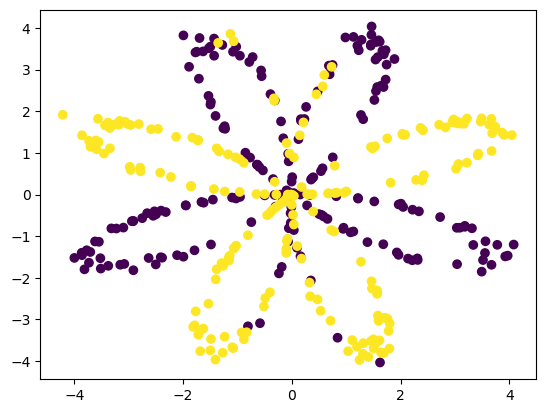

In [89]:
X, Y = load_planar_dataset()
print(f"dataset: X: {X.shape}, Y: {Y.shape}")
plt.scatter(X[0,:], X[1,:], c=Y)
plt.show()

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

print(f"train set shape: X: {X_train.shape}, Y: {Y_train.shape}")
print(f"test set shape: X: {X_test.shape}, Y: {Y_test.shape}")

train set shape: X: (2, 320), Y: (1, 320)
test set shape: X: (2, 80), Y: (1, 80)


In [91]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [92]:
def initialize_parameters(n_x, n_h):
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(1,n_h) * 0.01
    b2 = np.zeros((1,1))
    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return params

In [93]:
def forward(X, params):
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "W1": W1,
        "W2": W2,
        "A1": A1,
        "A2": A2
    }

    return A2, cache

In [113]:
def compute_loss(Y, A):
    loss = - np.sum(Y*np.log(A) + (1-Y)*np.log(1-A), axis=1) / Y.shape[1]
    return np.squeeze(loss)

In [114]:
def gradient_computation(X, Y, cache):

    m = X.shape[1]
    
    W1 = cache["W1"]
    W2 = cache["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1-A1**2)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {
        "dW2": dW2,
        "db2": db2,
        "dW1": dW1,
        "db1": db1
    }
    
    return grads

In [115]:
def model(X_train, Y_train, X_test, Y_test, n_h=10, num_of_epochs=2000, learning_rate=0.01):
    n_x = X_train.shape[0]

    params = initialize_parameters(n_x, n_h)
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    train_losses = []
    test_losses = []
    for epoch in range(num_of_epochs):

        # forward path
        A2, cache = forward(X_train, params)

        # train loss calculation
        train_losses.append(compute_loss(Y_train, A2))
        # test loss calculation
        A2_test, _ = forward(X_test, params)
        test_losses.append(compute_loss(Y_test, A2_test))

        # calculate gradients
        grads = gradient_computation(X_train, Y_train, cache)
        
        # backward
        W1 -= learning_rate*grads["dW1"]
        b1 -= learning_rate*grads["db1"]
        W2 -= learning_rate*grads["dW2"]
        b2 -= learning_rate*grads["db2"]

        params = {
            "W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2
        }
    
    return params, train_losses, test_losses

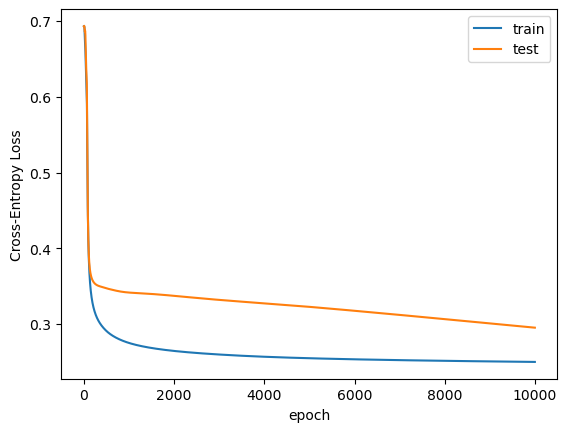

In [238]:
params, train_losses, test_losses = model(X_train, Y_train, X_test, Y_test, n_h=4, num_of_epochs=10000, learning_rate=1.2)
plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")
plt.xlabel("epoch")
plt.ylabel("Cross-Entropy Loss")
plt.legend()
plt.show()

In [239]:
def predict(X, params):
    A2, _ = forward(X, params)
    Y_pred = (A2 >= 0.5) * 1.0
    return Y_pred

In [240]:
train_accuracy = np.sum(predict(X_train, params) == Y_train) / Y_train.shape[1]
test_accuracy = np.sum(predict(X_test, params) == Y_test) / Y_test.shape[1]
print(f"train accuracy = {train_accuracy*100}%")
print(f"test accuracy = {test_accuracy*100}%")


train accuracy = 90.9375%
test accuracy = 87.5%
